In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q azure-quantum[qiskit]
!pip install -q qiskit_machine_learning


!pip install -q pennylane
!pip install -q pennylane-sf --upgrade

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Iris dataset into the variable 'iris_data'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np
import torch
import qiskit
import pennylane as qml
import ipywidgets as widgets

from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from IPython.display import display
from qiskit.circuit.library import ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, ADAM, SPSA
from qiskit.opflow import PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes

from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.decomposition import PCA
from torch.nn.functional import relu
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import EfficientSU2
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

np.random.seed(42)

In [ ]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Total of 150 samples (instances) with 4 featurers (attributes) and 3 labels (classes)

In [ ]:
features = iris_data.data
labels = iris_data.target

print(features.shape)
print(labels.shape)

(150, 4)
(150,)


In [ ]:
# View of the features data.
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

We see that the features array is not normalised with values of different ranges for example we have [4.3, 7.9] and [0.1, 2.5]. For this approach we will use a simple transformation approach in which we can set the ranges to a [0, 1] interval.

In [ ]:
# Fit the scaler to the features data and transform it
features = MinMaxScaler().fit_transform(features)
features.shape

(150, 4)

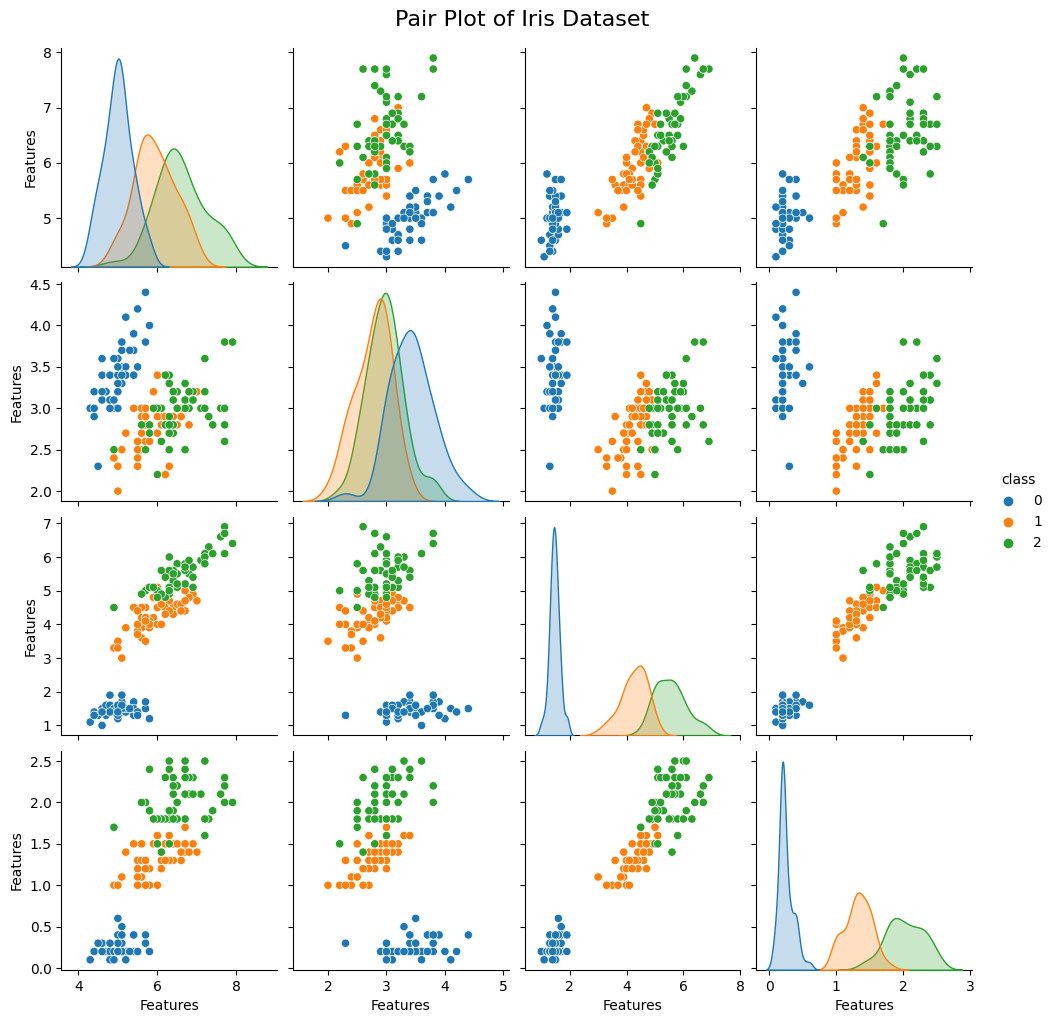

In [ ]:
# Create a DataFrame from the Iris dataset
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

# Generate a pair plot with detailed output
pairplot = sns.pairplot(df, hue="class", palette="tab10")

# Add informative titles and axis labels
pairplot.fig.suptitle("Pair Plot of Iris Dataset", y=1.02, fontsize=16)
pairplot.set(xlabel="Features", ylabel="Features")

# Display the pair plot
plt.show()

From this data visualisation we can see that plots for class 0 potray more separability whilst for class 1 and 2 there is more intertwined relationship especially with the sepal width feature this will contribute to feature engineering.

### Training a classical ML model:
     With a focus on Support Vector Machines:

Using Scikit-learn, the data is split into a train set, validation set and test set.


In [ ]:
algorithm_globals.random_seed = 123

# Split the data into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=algorithm_globals.random_seed)

# Further split the train set into train and validation sets
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.3, random_state=algorithm_globals.random_seed)

In [ ]:
print(train_features.shape[0])
print(val_features.shape[0])
print(test_features.shape[0])

84
36
30


In [ ]:
svc = SVC()
_ = svc.fit(train_features, train_labels)

In [ ]:
train_score = svc.score(train_features, train_labels)
validation_score = svc.score(val_features, val_labels)
test_score = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset:   {train_score:.2f}")
print(f"Classical SVC on the validation dataset: {validation_score:.2f}")
print(f"Classical SVC on the test dataset:       {test_score:.2f}")

Classical SVC on the training dataset:   0.99
Classical SVC on the validation dataset: 0.97
Classical SVC on the test dataset:       0.97


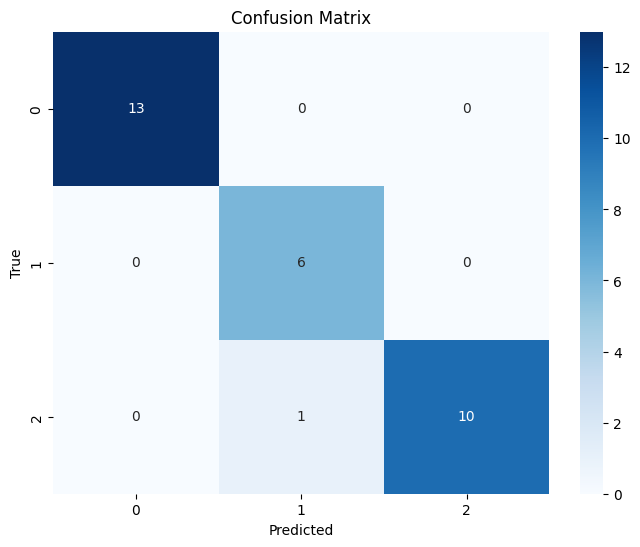

In [ ]:
# Assuming you have already trained and obtained predictions from your model
predictions = svc.predict(test_features)

# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# For the next step, explore training a variational quantum classifier (VQC) with the same dataset.

# To implement a simple VQC model we need to examine what comprises of the VQC class

Main elements are:
    1 - Feature Map
    2 - Ansatz

# ZZFeatureMap


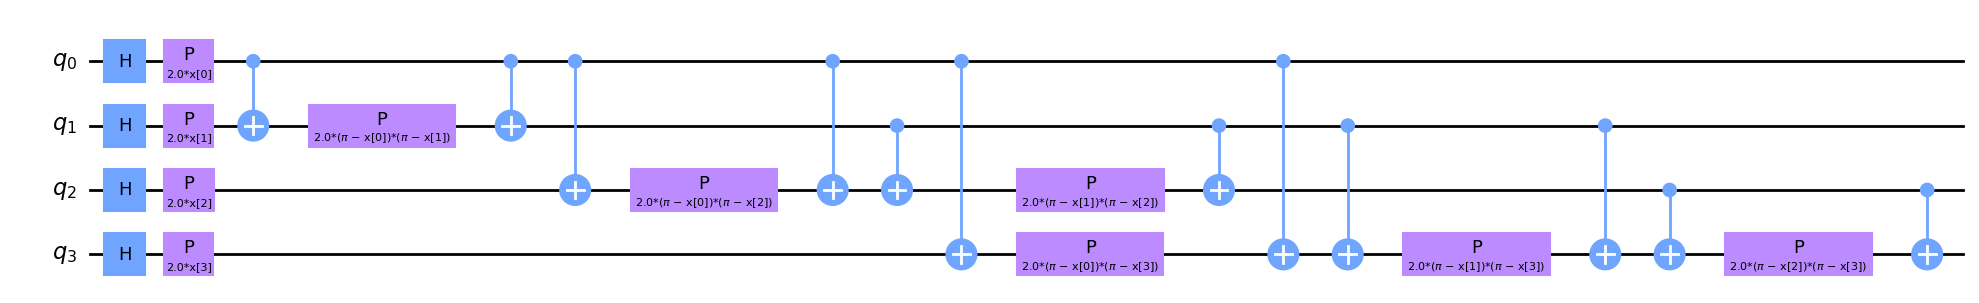

In [ ]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=30)

If you look closely at the feature map diagram, you will notice parameters x[0], ..., x[3]. These are placeholders for our features.

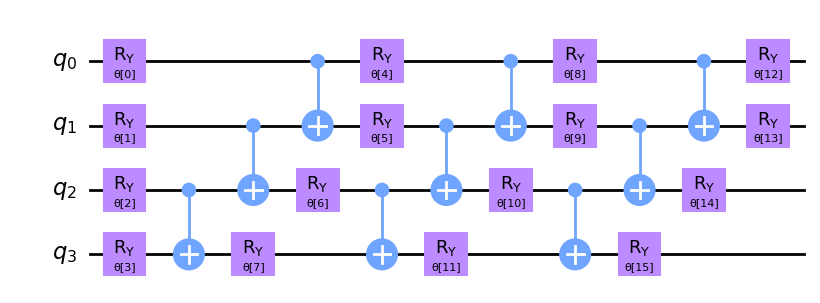

In [ ]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

This circuit has 16 parameters named θ[0], ..., θ[15]. These are the trainable weights of the classifier.

We then choose an optimization algorithm to use in the training process. This step is similar to what you may find in classical deep learning frameworks. To make the training process faster, we choose a gradient-free optimizer. You may explore other optimizers available in Qiskit

In [ ]:
# Constrained Optimization by Linear Approximation to optimize classical parameters associated with quantum circuits rather than directly optimizing quantum states.
optimizer = COBYLA(maxiter=100)

Train classifier on a simulator cause we are still classical.

Introduce the sampler:
A Sampler is a special tool that helps us perform calculations and experiments on the quantum computer or simulator. We create an instance of the Sampler and give it the name "sampler."

In [ ]:
sampler = Sampler()

Now, we want to keep track of how well our classifier is doing as it goes through the training process. So, we add something called a "callback function," which is like a special function that gets called or activated at certain points during the training. We give our callback function the name "callback_graph."

In [ ]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

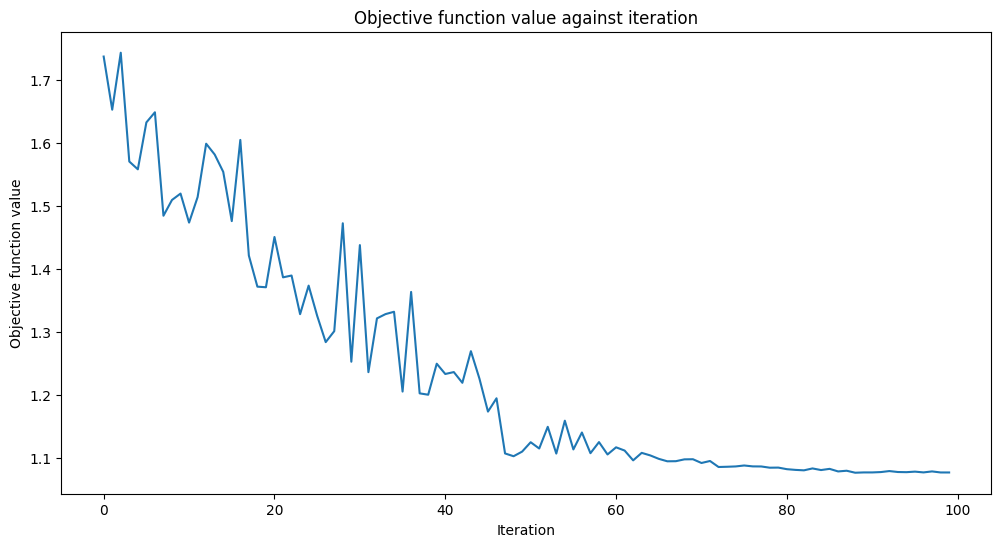

Training time: 133 seconds


In [ ]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
validation_score_q4 = vqc.score(val_features, val_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the validation dataset: {validation_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.85
Quantum VQC on the validation dataset: 0.89
Quantum VQC on the test dataset:     0.77


## Now let’s see what we can tune to get even better models

<Axes: >

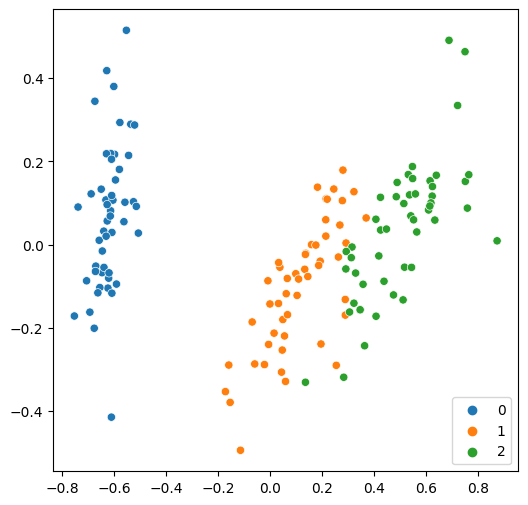

In [ ]:
features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=algorithm_globals.random_seed)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.90


In [ ]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

# Select the ideal Optimiser

In [ ]:
optimizer = COBYLA(maxiter=40)

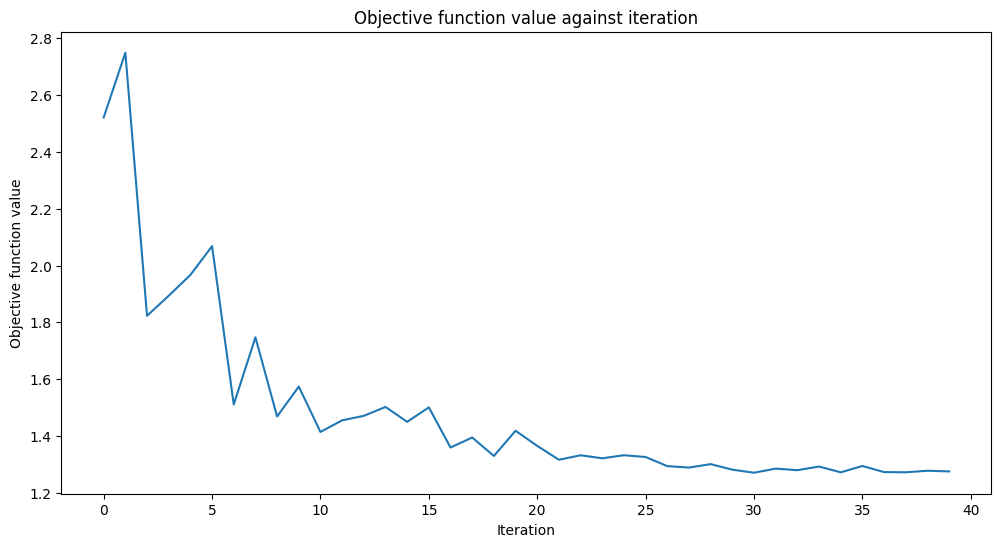

Training time: 37 seconds


In [ ]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.58
Quantum VQC on the test dataset using RealAmplitudes:     0.63


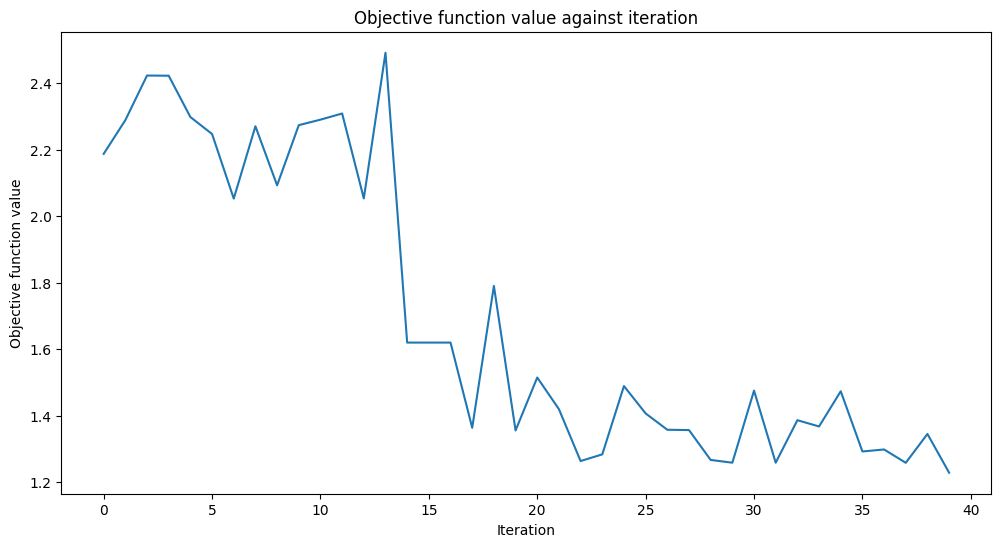

Training time: 42 seconds


In [ ]:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.71
Quantum VQC on the test dataset using EfficientSU2:     0.63


In [ ]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score:10.2f} | {test_score:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.99 |       0.97
VQC, 4 features, RealAmplitudes |       0.85 |       0.77
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.90
VQC, 2 features, RealAmplitudes |       0.58 |       0.63
VQC, 2 features, EfficientSU2   |       0.71 |       0.63


# Focus on the implementation of Support Vector Machines for classical and for quantum platforms

Here we look to discover the connections between the quantum models and the kernel methods (mainly employed in support vector machines) to clearly assess which models perform well in comparison to a classical support vector machine.

For this approach, we aim to apply a classical kernel method to a quantum machine learning model in order to simpliify the approach. Focus:

# 1 - Classical kernel method on a quantum ML model.

Kernel-based training bypasses the processing and measurement steps of common variational circuits and relies solely on the data encoding.

We consider a quantum model $F(x)$that takes in data inputs with a fixed quantum embedding that represents classical data points as a set of gate parameters in a QC, creating quantum states $|\phi(x)\rangle$ in Hilbert spaces via a quantum feature map.

Quantum kernel is calculated based on the mutual overlap of two data-encoding quantum states, denoted as $\kappa(x, x') = | \langle \phi(x') | \phi(x)\rangle|^2$.
Kernel-based training bypasses the processing and measurement steps of common variational circuits and relies solely on the data encoding.


If the loss function used is the hinge loss, the kernel method corresponds to a standard support vector machine (SVM), which is a type of maximum-margin classifier. Different convex loss functions can lead to variations of support vector machines.

Theory predicts that kernel-based training will always find better or equally good solutions for minimizing this risk.

However, in this demonstration, the variational training is regularized differently, which makes it difficult to directly compare the quality of the solutions obtained through kernel-based and variational training.

The two training methods optimize slightly different cost functions, so it's outside the scope of this demonstration to determine which method finds a better minimum.


# 2 - Variational method with a focus on Stochastic gradient descent


# 3 - Classical Support Vector Machine  

Model efficiency, accuracy:

In [ ]:
X, y = load_iris(return_X_y=True)

# scaling the inputs is important since the embedding we use is periodic
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# This line scales the target vector y to have values of -1 and 1 instead of 0 and 1. This scaling is commonly used for SVMs and hinge loss optimization.
y_scaled = 2 * (y - 0.5)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [ ]:
# The number of qubits is equal to the number of features in the training data

n_qubits = len(X_train[0])
n_qubits

4

In [ ]:
# quantum kernel evaluator
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel, interface="autograd")
def kernel(x1, x2):
    # Angle embedding encodes the features by using the specified rotation operation.

    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [ ]:
kernel(X_train[0], X_train[0])

tensor(1., requires_grad=True)

In [ ]:
def kernel_matrix(A, B):
    return np.array([[kernel(a, b) for b in B] for a in A])

In [ ]:
# Start the timer
start_time = time.time()

# Train the SVM model
svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")


Training Time: 106.94704246520996 seconds


In [ ]:
predictions = svm.predict(X_test)
accuracy_score(predictions, y_test)

0.9736842105263158

In [ ]:
dev_kernel.num_executions

16801

In [ ]:
def circuit_evals_kernel(n_data, split):
    """Compute how many circuit evaluations one needs for kernel-based
       training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = M * M
    n_prediction = M * Mpred

    return n_training + n_prediction

In [ ]:
circuit_evals_kernel(n_data=len(X), split=len(X_train) /(len(X_train) + len(X_test)))

16800

Accuracy: 0.9736842105263158


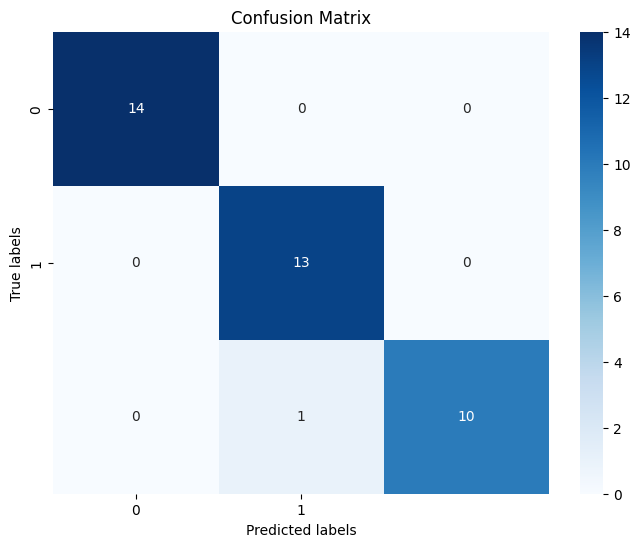

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        14
         1.0       0.93      1.00      0.96        13
         3.0       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate predictions
predictions = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(predictions, y_test)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


In [ ]:
# A similar example using variational training
dev_var = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev_var, interface="torch", diff_method="parameter-shift")
def quantum_model(x, params):
    """A variational quantum model."""

    # embedding
    AngleEmbedding(x, wires=range(n_qubits))

    # trainable measurement
    StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def quantum_model_plus_bias(x, params, bias):
    """Adding a bias."""
    return quantum_model(x, params) + bias

def hinge_loss(predictions, targets):
    """Implements the hinge loss."""
    all_ones = torch.ones_like(targets)
    hinge_loss = all_ones - predictions * targets
    # trick: since the max(0,x) function is not differentiable,
    # use the mathematically equivalent relu instead
    hinge_loss = relu(hinge_loss)
    return hinge_loss

def quantum_model_train(n_layers, steps, batch_size):
    """Train the quantum model defined above."""

    params = np.random.random((n_layers, n_qubits, 3))
    params_torch = torch.tensor(params, requires_grad=True)
    bias_torch = torch.tensor(0.0)

    opt = torch.optim.Adam([params_torch, bias_torch], lr=0.1)

    loss_history = []
    for i in range(steps):

        batch_ids = np.random.choice(len(X_train), batch_size)

        X_batch = X_train[batch_ids]
        y_batch = y_train[batch_ids]

        X_batch_torch = torch.tensor(X_batch, requires_grad=False)
        y_batch_torch = torch.tensor(y_batch, requires_grad=False)

        def closure():
            opt.zero_grad()
            preds = torch.stack(
                [quantum_model_plus_bias(x, params_torch, bias_torch) for x in X_batch_torch]
            )
            loss = torch.mean(hinge_loss(preds, y_batch_torch))

            # bookkeeping
            current_loss = loss.detach().numpy().item()
            loss_history.append(current_loss)
            if i % 10 == 0:
                print("step", i, ", loss", current_loss)

            loss.backward()
            return loss

        opt.step(closure)

    return params_torch, bias_torch, loss_history


def quantum_model_predict(X_pred, trained_params, trained_bias):
    """Predict using the quantum model defined above."""

    p = []
    for x in X_pred:

        x_torch = torch.tensor(x)
        pred_torch = quantum_model_plus_bias(x_torch, trained_params, trained_bias)
        pred = pred_torch.detach().numpy().item()
        if pred > 0:
            pred = 1
        else:
            pred = -1

        p.append(pred)
    return p

In [ ]:
n_layers = 2
batch_size = 20
steps = 250
trained_params, trained_bias, loss_history = quantum_model_train(n_layers, steps, batch_size)

step 0 , loss 0.9360671255314141
step 10 , loss 0.6258810903035169
step 20 , loss 0.6375124067583295
step 30 , loss 0.5242625253316309
step 40 , loss 0.5362447531249037
step 50 , loss 0.6189461709698174
step 60 , loss 0.6628856769461111
step 70 , loss 0.5360082721902415
step 80 , loss 0.4637948176588565
step 90 , loss 0.25344527830303526
step 100 , loss 0.13653959129234258
step 110 , loss 0.31137058815126484
step 120 , loss 0.42750221148959777
step 130 , loss 0.3400654328922561
step 140 , loss 0.5704005972019031
step 150 , loss 0.36863760828401787
step 160 , loss 0.2873456188499235
step 170 , loss 0.35358537870804735
step 180 , loss 0.3467143198241286
step 190 , loss 0.38901375561544466
step 200 , loss 0.4234075340148976
step 210 , loss 0.3639321362598925
step 220 , loss 0.26735207931542615
step 230 , loss 0.43786348784870854
step 240 , loss 0.2324039935801176


accuracy on test set: 0.6578947368421053


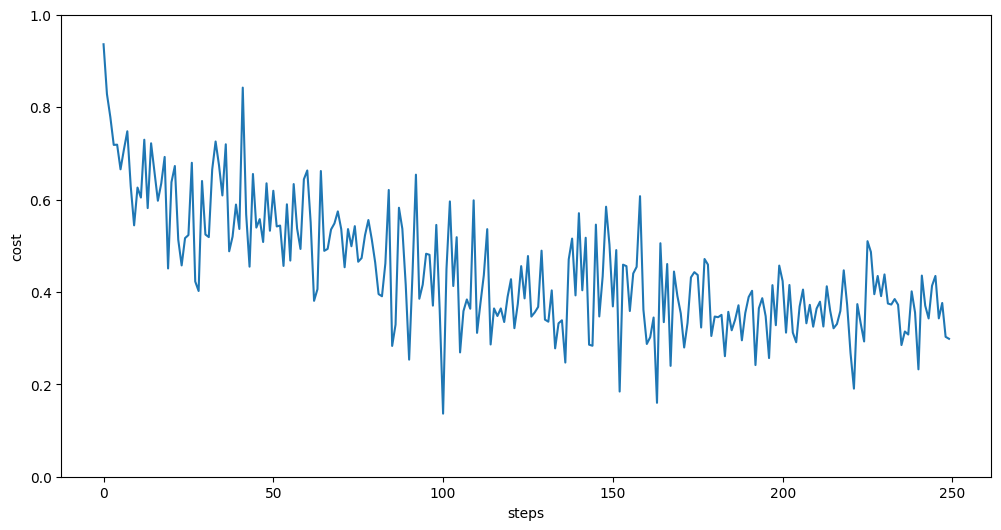

In [ ]:
pred_test = quantum_model_predict(X_test, trained_params, trained_bias)
print("accuracy on test set:", accuracy_score(pred_test, y_test))

plt.plot(loss_history)
plt.ylim((0, 1))
plt.xlabel("steps")
plt.ylabel("cost")
plt.show()


In [ ]:
def circuit_evals_variational(n_data, n_params, n_steps, shift_terms, split, batch_size):
    """Compute how many circuit evaluations are needed for
       variational training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_params * n_steps * batch_size * shift_terms
    n_prediction = Mpred

    return n_training + n_prediction
    # return int(n_training + n_prediction)

In [ ]:
circuit_evals_variational(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    shift_terms=2,
    split=len(X_train) /(len(X_train) + len(X_test)),
    batch_size=batch_size,
)

24038

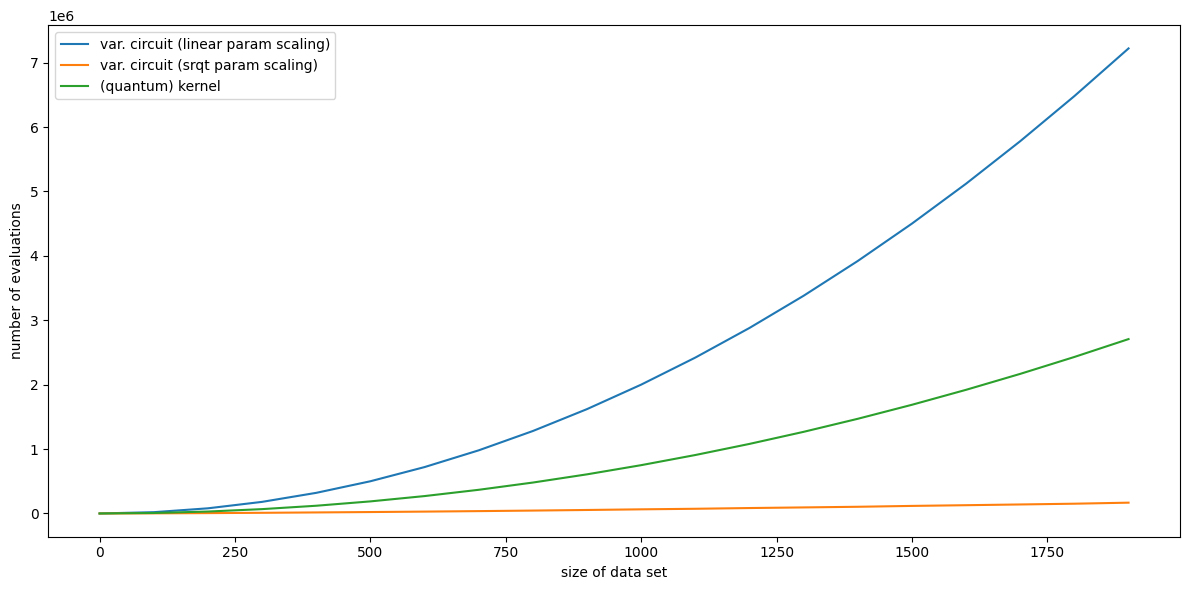

In [ ]:
variational_training1 = []
variational_training2 = []
kernelbased_training = []
x_axis = range(0, 2000, 100)

for M in x_axis:

    var1 = circuit_evals_variational(
        n_data=M, n_params=M, n_steps=M,  shift_terms=2, split=0.75, batch_size=1
    )
    variational_training1.append(var1)

    var2 = circuit_evals_variational(
        n_data=M, n_params=round(np.sqrt(M)), n_steps=M,
        shift_terms=2, split=0.75, batch_size=1
    )
    variational_training2.append(var2)

    kernel = circuit_evals_kernel(n_data=M, split=0.75)
    kernelbased_training.append(kernel)

plt.plot(x_axis, variational_training1, label="var. circuit (linear param scaling)")
plt.plot(x_axis, variational_training2, label="var. circuit (srqt param scaling)")
plt.plot(x_axis, kernelbased_training, label="(quantum) kernel")
plt.xlabel("size of data set")
plt.ylabel("number of evaluations")
plt.legend()
plt.tight_layout()
plt.show()